# Clustering

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# User defined Data set

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
   n_samples=100, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0)

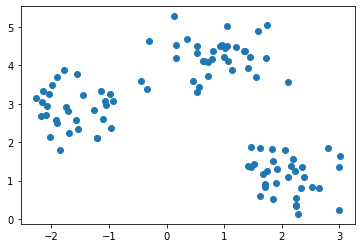

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=200, 
    tol=1e-04, random_state=0)

In [5]:
y_km = km.fit_predict(X)

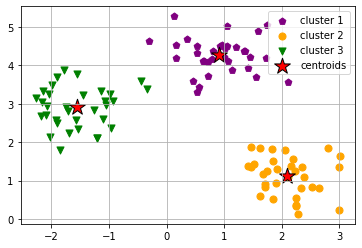

In [6]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='purple', s=50, marker='p', label='cluster 1')

plt.scatter( X[y_km == 1, 0], X[y_km == 1, 1], c='orange', s=50, marker='o', label='cluster 2')

plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], c='green', s=50, marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [7]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,0.914716,4.266371
1,2.097297,1.124714
2,-1.556051,2.902306


In [8]:
km.inertia_

48.23520512521981

In [9]:
km.n_iter_

6

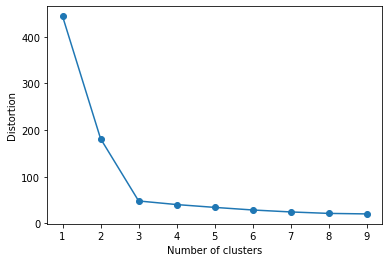

In [10]:
distortions = []
for i in range(1,10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Inference

We have created a dataset using make_blobs function so that we can understand the clustring problem in a better manner. There are 100 rows, 2 columns and 3 clusters for the same. We again use the elbow method to identify that 3 is best answer for the same. We visualize the data points and use the algorithm. The points categorized in a single cluster are marked with same color has a centroid. The dataset can finally be divided into 3 different clusters.

# User defined K-means function

In [11]:
col1 = np.random.random(100) #[5, 5, 5, 7, 6, 7, 6, 6, 7]
col2 = np.random.random(100) #[4, 3, 3, 3, 3, 3, 3, 3, 3]
col3 = np.random.random(100) #[1, 1, 1, 5, 5, 5, 6, 5, 6]

udata  = {'Col1':col1, 'Col2':col2, 'Col3':col3}

df = pd.DataFrame(udata)

In [12]:
df

,Col1,Col2,Col3
0,0.125688,0.744690,0.728198
1,0.951104,0.670012,0.945585
2,0.408382,0.793626,0.983244
3,0.072450,0.574842,0.292958
4,0.979980,0.799285,0.130090
...,...,...,...
95,0.574554,0.464832,0.051231
96,0.925993,0.721470,0.416870
97,0.614578,0.297210,0.834467
98,0.281769,0.863939,0.465111


In [13]:
def kmean(df, k, n):
  sam = df.sample(k)
  for i in range(n):  
    c = 1
    print('Iteration: {}'.format(i+1))
    for j in range(k):
        print('   Centroid {}: \n    Col 1: {:2.3f}, Col 2: {:2.3f}, Col 3: {:2.3f}'.format(c, sam.iloc[j][0], sam.iloc[j][1], sam.iloc[j][2]))
        var = 'Dist'+str(c)
        df[var] = np.sqrt((np.power(np.subtract(df.iloc[:,0], sam.iloc[j][0]), 2) + (np.power(np.subtract(df.iloc[:,1], sam.iloc[j][1]), 2)) + 
                                                                               (np.power(np.subtract(df.iloc[:,2], sam.iloc[j][2]), 2))))
        c += 1
    a = []
    for p in range(df.shape[0]):
        distances = [df.iloc[p,3], df.iloc[p,4], df.iloc[p,5]]
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        a.append(cluster[0])
    df['Cluster'] = a

    new_centroids = []
    for c in set(df['Cluster']):
        current_cluster = df[df['Cluster']==c].iloc[:,3]
        cluster_mean = current_cluster.mean(axis=0)
        sam.iloc[c, 0] = cluster_mean

        current_cluster = df[df['Cluster']==c].iloc[:,4]
        cluster_mean = current_cluster.mean(axis=0)
        sam.iloc[c, 1] = cluster_mean

        current_cluster = df[df['Cluster']==c].iloc[:,5]
        cluster_mean = current_cluster.mean(axis=0)
        sam.iloc[c, 2] = cluster_mean

    fig = plt.figure(figsize = (8, 6))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(df[df['Cluster']==0]['Col1'], df[df['Cluster']==0]['Col2'], df[df['Cluster']==0]['Col3'], s=70, c='purple', marker='p', label='cluster 1')

    ax.scatter3D(df[df['Cluster']==1]['Col1'], df[df['Cluster']==1]['Col2'], df[df['Cluster']==1]['Col3'], s=50, c='orange', marker='o', label='cluster 2')

    ax.scatter3D(df[df['Cluster']==2]['Col1'], df[df['Cluster']==2]['Col2'], df[df['Cluster']==2]['Col3'], s=75, c='green', marker='v', label='cluster 3')

    ax.scatter3D(
        sam.iloc[:, 0], sam.iloc[:, 1], sam.iloc[:, 2],
        s=275, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )

    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

    print()

    plt.scatter(df[df['Cluster']==0]['Col1'], df[df['Cluster']==0]['Col2'], c='purple', s=50, marker='p', label='cluster 1')

    plt.scatter(df[df['Cluster']==1]['Col1'], df[df['Cluster']==1]['Col2'], c='orange', s=50, marker='o', label='cluster 2')

    plt.scatter(df[df['Cluster']==2]['Col1'], df[df['Cluster']==2]['Col2'], c='green', s=50, marker='v', label='cluster 3')

    plt.scatter(
        sam.iloc[:3, 0], sam.iloc[:3, 1],
        s=275, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()
    print('\n')

Iteration: 1
   Centroid 1: 
    Col 1: 0.079, Col 2: 0.212, Col 3: 0.749
   Centroid 2: 
    Col 1: 0.049, Col 2: 0.998, Col 3: 0.816
   Centroid 3: 
    Col 1: 0.667, Col 2: 0.358, Col 3: 0.819


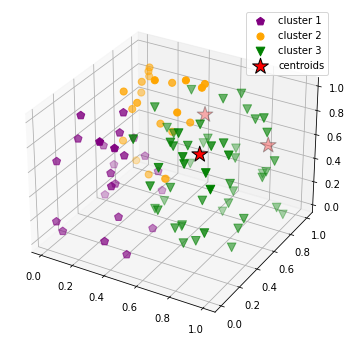

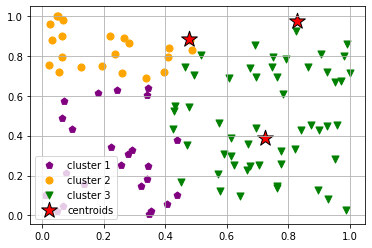



Iteration: 2
   Centroid 1: 
    Col 1: 0.478, Col 2: 0.887, Col 3: 0.668
   Centroid 2: 
    Col 1: 0.724, Col 2: 0.386, Col 3: 0.751
   Centroid 3: 
    Col 1: 0.829, Col 2: 0.977, Col 3: 0.481


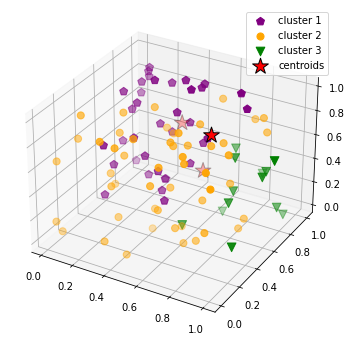

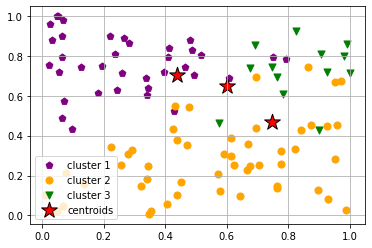



Iteration: 3
   Centroid 1: 
    Col 1: 0.438, Col 2: 0.702, Col 3: 0.699
   Centroid 2: 
    Col 1: 0.747, Col 2: 0.471, Col 3: 0.858
   Centroid 3: 
    Col 1: 0.601, Col 2: 0.647, Col 3: 0.398


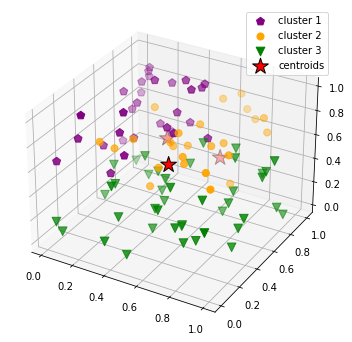

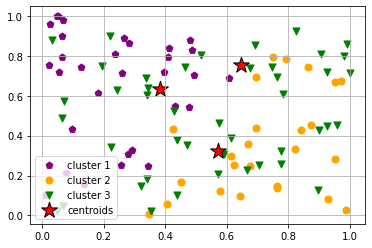



Iteration: 4
   Centroid 1: 
    Col 1: 0.384, Col 2: 0.633, Col 3: 0.595
   Centroid 2: 
    Col 1: 0.571, Col 2: 0.324, Col 3: 0.650
   Centroid 3: 
    Col 1: 0.646, Col 2: 0.757, Col 3: 0.451


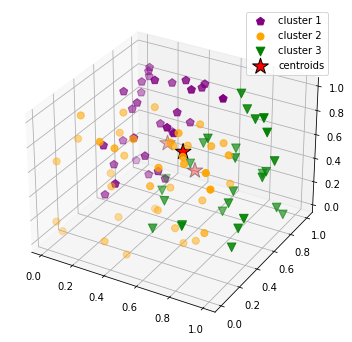

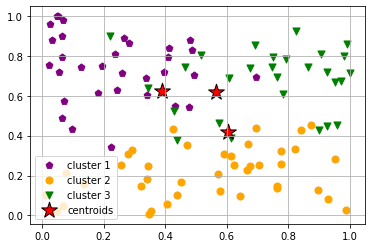

In [14]:
kmean(df, 3, 4)

In [15]:
df['Cluster'].value_counts()

1    40
0    32
2    28
Name: Cluster, dtype: int64

In [16]:
df.head()

,Col1,Col2,Col3,Dist1,Dist2,Dist3,Cluster
0,0.125688,0.744690,0.728198,0.311375,0.617219,0.589888,0
1,0.951104,0.670012,0.945585,0.667636,0.592890,0.586931,2
2,0.408382,0.793626,0.983244,0.420772,0.598153,0.583796,0
3,0.072450,0.574842,0.292958,0.437931,0.662100,0.622758,0
4,0.979980,0.799285,0.130090,0.774113,0.814095,0.465072,2


## Inference

We have created a dataset using random function. There are 100 rows, 4 columns. We manually code the kmeans function to find the clustering values for the data. We have written code for each and every step which includes distance calculation, cluster value, centroid updation, visualization, etc.